In [1]:
import grpc

import minecraft_pb2_grpc
from minecraft_pb2 import *

channel = grpc.insecure_channel('localhost:5001')
client = minecraft_pb2_grpc.MinecraftServiceStub(channel)

client.fillCube(FillCubeRequest(  # Clear a 20x10x20 working area
    cube=Cube(
        min=Point(x=-10, y=4, z=-10),
        max=Point(x=10, y=14, z=10)
    ),
    type=AIR
))
client.spawnBlocks(Blocks(blocks=[  # Spawn a flying machine
    # Lower layer
    Block(position=Point(x=1, y=5, z=1), type=PISTON, orientation=NORTH),
    Block(position=Point(x=1, y=5, z=0), type=SLIME, orientation=NORTH),
    Block(position=Point(x=1, y=5, z=-1), type=STICKY_PISTON, orientation=SOUTH),
    Block(position=Point(x=1, y=5, z=-2), type=PISTON, orientation=NORTH),
    Block(position=Point(x=1, y=5, z=-4), type=SLIME, orientation=NORTH),
    # Upper layer
    Block(position=Point(x=1, y=6, z=0), type=REDSTONE_BLOCK, orientation=NORTH),
    Block(position=Point(x=1, y=6, z=-4), type=REDSTONE_BLOCK, orientation=NORTH),
    # Activate
    Block(position=Point(x=1, y=6, z=-1), type=QUARTZ_BLOCK, orientation=NORTH),
]))

In [8]:
import minecraft_pb2

In [28]:
dir(client)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'fillCube',
 'readCube',
 'spawnBlocks']

In [16]:
minecraft_pb2_grpc.

<module 'minecraft_pb2_grpc' from '/Users/akarshkumar0101/Evocraft-py/minecraft_pb2_grpc.py'>

In [26]:
291/15

19.4

In [31]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


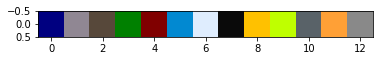

In [39]:
plt.imshow(cols[None])

In [40]:
b_map

[18, 96, 25, 98, 185, 48, 45, 151, 252, 125, 217, 152, 217]

In [42]:

import numpy as np
import torch
import matplotlib.pyplot as plt

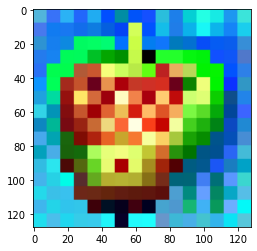

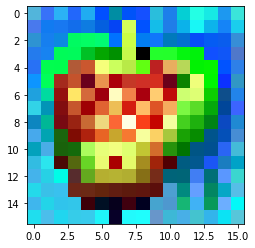

In [43]:

img = plt.imread('../evocraft-2022/sample.png')
plt.imshow(img)
plt.show()
img = img[::128//16, ::128//16, :]
plt.imshow(img)
plt.show()

In [83]:

all_mc_cols = np.array([
    [0, 0, 128],
    [144, 135, 147],
    [87, 72, 58],
    [0, 128, 0],
    [128, 0, 0],
    [2, 137, 209],
    [223.6294, 237.0306, 254.0567],
    [10, 10, 10],
    [255, 193, 0],
    [191, 255, 0],
    [89.9944,  98.8727, 104.9356],
    [257.6869, 160.5991,  54.7574],
    [137, 137, 137],
]) / 255
all_mc_block_ids = np.array([BLUE_GLAZED_TERRACOTTA, GRAY_GLAZED_TERRACOTTA,
                             BROWN_GLAZED_TERRACOTTA, GREEN_GLAZED_TERRACOTTA,
                             RED_GLAZED_TERRACOTTA, CYAN_GLAZED_TERRACOTTA, 
                             CONCRETE, OBSIDIAN, YELLOW_GLAZED_TERRACOTTA, 
                             LIME_GLAZED_TERRACOTTA, STONE, 
                             ORANGE_GLAZED_TERRACOTTA, STONE])

def get_mc_structure(img):
    # shape = img.shape
    x = all_mc_cols[:, None, None, :] - img
    x = np.linalg.norm(x, ord=2, axis=-1)
    x = x.argmin(axis=0)
    return all_mc_cols[x], all_mc_block_ids[x]
    
newimg, blockids = get_mc_structure(img)

In [88]:
! ls ../evocraft-2022/imgs

apple.png     candy.png     dessert.png   green.png     scarlet.png
auburn.png    cardinal.png  fig.png       ice cream.png shrub.png
banana.png    cherry.png    food.png      leaves.png    sugar.png
blueberry.png chocolate.png forest.png    pastry.png    sweet.png
burgundy.png  crimson.png   fruit.png     pie.png       tart.png
cake.png      date.png      grass.png     red.png       tree.png


In [89]:
import os

In [120]:
def mc_spawn_img(img, blockids, x):
    xs = np.arange(x, x+img.shape[0], 1)[::-1]
    ys = np.arange(10, 11, 1)
    zs = np.arange(0, img.shape[1], 1)

    xs, ys, zs = np.meshgrid(xs, ys, zs, indexing='ij')
    xs, ys, zs = xs.flatten(), ys.flatten(), zs.flatten()
    

    # block_ids = np.zeros_like(xs)
    block_ids = blockids.flatten()
    
    print(x, xs.min(), xs.max())

    blocks = [Block(position=Point(x=x, y=y, z=z), type=block_id, orientation=UP) for x, y, z, block_id in zip(xs, ys, zs, block_ids)]
    client.spawnBlocks(Blocks(blocks=blocks))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


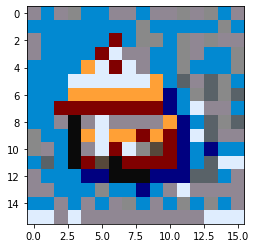

16 16 31


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


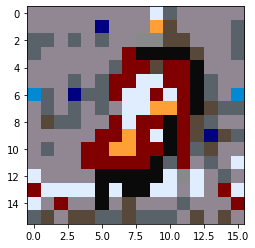

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32 32 47


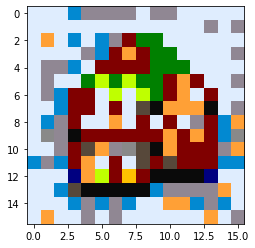

48 48 63


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


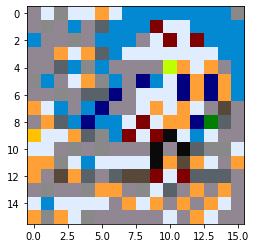

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


64 64 79


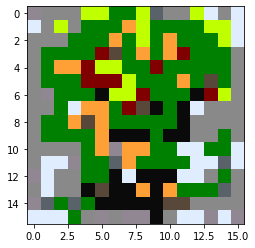

80 80 95


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


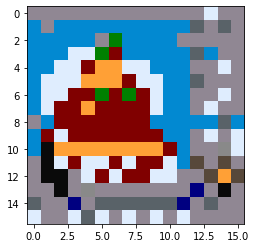

96 96 111


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


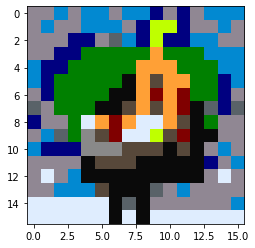

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


112 112 127


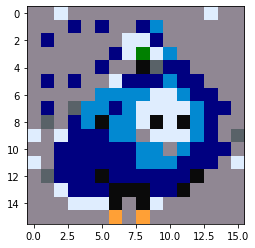

128 128 143


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


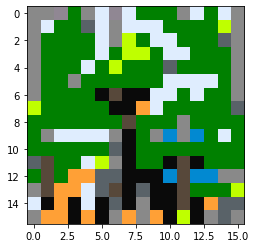

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


144 144 159


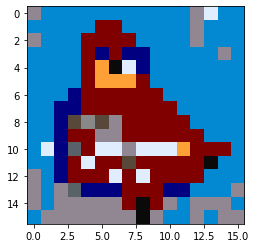

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


160 160 175


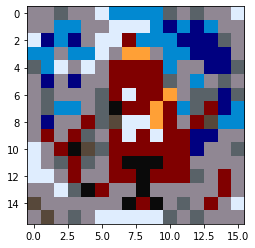

176 176 191


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


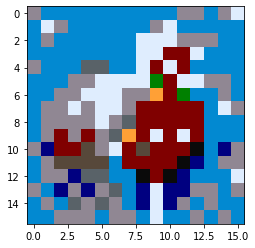

192 192 207


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


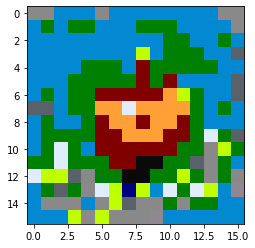

208 208 223


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


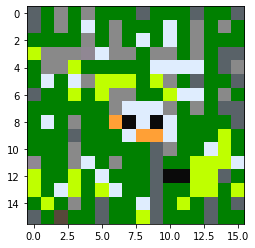

224 224 239


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


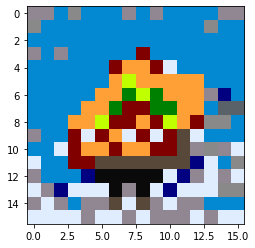

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


240 240 255


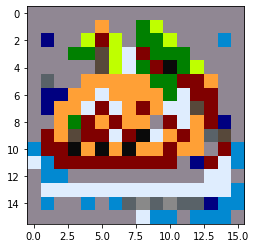

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


256 256 271


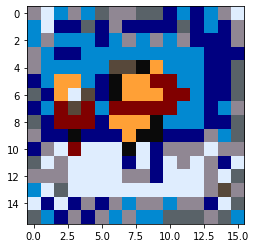

272 272 287


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


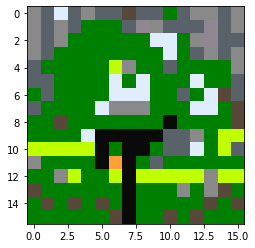

288 288 303


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


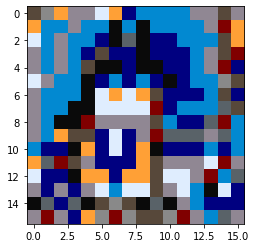

304 304 319


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


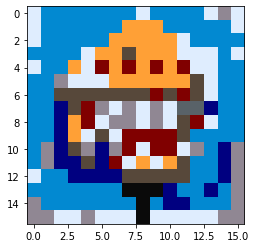

320 320 335


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


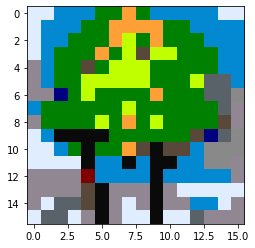

336 336 351


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


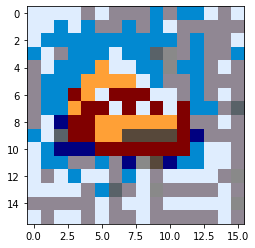

352 352 367


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


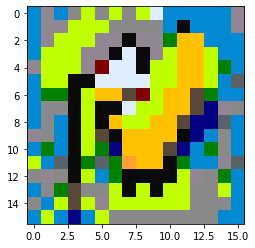

368 368 383


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


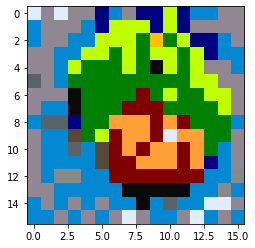

384 384 399


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


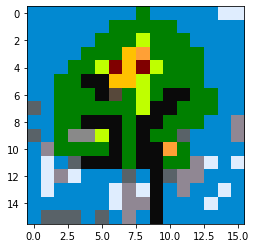

400 400 415


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


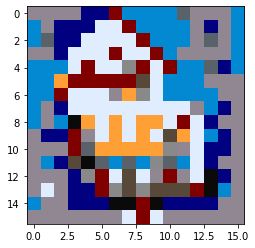

416 416 431


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


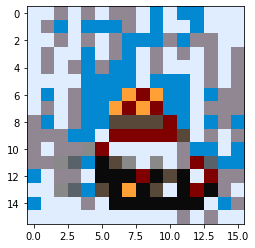

432 432 447


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


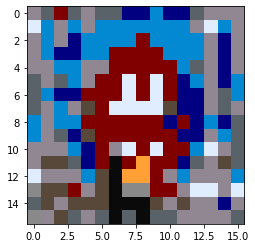

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


448 448 463


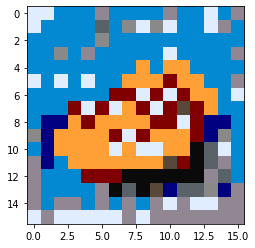

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


464 464 479


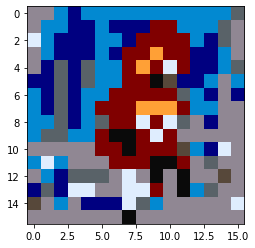

480 480 495


In [121]:
imgdir = '../evocraft-2022/imgs'
x = 0
for imgfile in os.listdir(imgdir):
    imgfile = imgdir+'/'+imgfile
    img = plt.imread(imgfile)
    img = img[::img.shape[0]//16, :: img.shape[1]//16]
    newimg, blockids = get_mc_structure(img)
    x+=img.shape[0]
    
    plt.imshow(newimg)
    plt.show()
    
    mc_spawn_img(newimg, blockids, x)

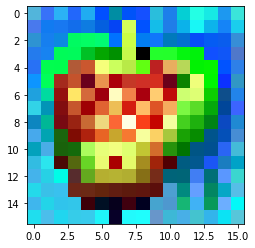

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


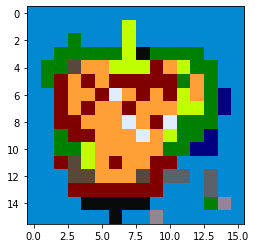

In [84]:

plt.imshow(img)
plt.show()
plt.imshow(newimg)
plt.show()

In [82]:
blocks = [Block(position=Point(x=0, y=10, z=1), type=48, orientation=NORTH)]
client.spawnBlocks(Blocks(blocks=blocks))


In [73]:
block_ids

array([ 48,  48,  48,  48,  48,  48,  48,  48,  48,  48,  48,  48,  48,
        48,  48,  48,  48,  48,  48,  48,  48,  48,  48, 125,  48,  48,
        48,  48,  48,  48,  48,  48,  48,  48,  48,  98,  48,  48,  48,
       125,  48,  48,  48,  48,  48,  48,  48,  48,  48,  48,  98,  98,
        98,  98,  98, 125, 151,  98,  98,  98,  98,  48,  48,  48,  48,
        98,  98,  25, 152, 152, 125, 125, 125, 185, 152, 125,  98,  98,
        48,  48,  48,  98, 185, 152, 185, 152, 185, 185, 185, 185, 185,
        98, 152,  98,  48,  48,  48,  48, 185, 152, 152, 185,  45, 152,
       185, 152, 185, 125, 152,  98,  18,  48,  48,  48, 185, 152, 185,
       152, 152, 185, 152, 152, 152, 125, 125,  98,  18,  48,  48,  48,
       185, 185, 152, 152, 152,  45, 152, 185,  45,  98,  98,  98,  48,
        48,  48,  48,  98, 185, 185, 152, 152, 152,  45, 152, 125,  98,
        98,  18,  48,  48,  48,  48,  98,  98, 125, 152, 152, 152, 152,
       152,  98,  98,  18,  18,  48,  48,  48,  48, 185,  25, 12

In [69]:
{i: getattr(minecraft_pb2, i) for i in dir(minecraft_pb2) if getattr(minecraft_pb2, i)==0}





{'ACACIA_DOOR': 0, 'NORTH': 0}